In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("pizza_sales.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
data['order_date'] = pd.to_datetime(data['order_date'], format="%d-%m-%Y")



In [5]:
data['order_time']=pd.to_datetime(data['order_time'], format="%H:%M:%S")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 4.5+ MB


In [7]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [17]:
Total_revenue=data['total_price'].sum()
Total_orders = data['order_id'].nunique()
Total_pizza_sold=data['quantity'].sum()
Avg_pizza_per_order =Total_pizza_sold/Total_orders
Avg_order_value = Total_revenue/Total_orders

In [22]:
print("Total_revenue:",Total_revenue)
print("Total_orders:",Total_orders)
print("Total_pizza_sold:",Total_pizza_sold)
print("Avg_pizza_per_order:",Avg_pizza_per_order)
print(f"Avg_order_value: ${Avg_order_value:.2f}")

Total_revenue: 817860.05
Total_orders: 21350
Total_pizza_sold: 49574
Avg_pizza_per_order: 2.321967213114754
Avg_order_value: $38.31


In [26]:
#Pizzas sold according to there category
data.groupby('pizza_category')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)


,pizza_category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


In [29]:
sales_according_category=data.groupby('pizza_category')['total_price'].sum()
Total_revenue=data['total_price'].sum()
category_percent_sale =(sales_according_category/Total_revenue)*100
print("sales % by Pizza Category:",category_percent_sale)

sales % by Pizza Category: pizza_category
Chicken    23.955138
Classic    26.905960
Supreme    25.456311
Veggie     23.682591
Name: total_price, dtype: float64


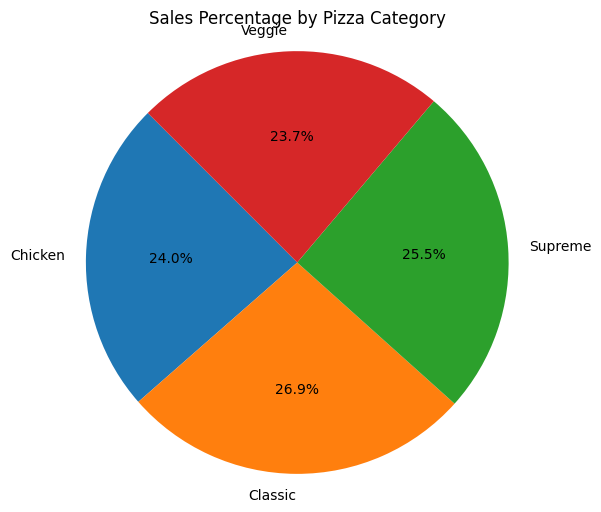

In [34]:
plt.figure(figsize=(6,6))

plt.pie(category_percent_sale, labels=category_percent_sale.index, autopct='%1.1f%%', startangle=135)
plt.title("Sales Percentage by Pizza Category")
plt.axis('equal')

plt.show()

In [47]:
# sales according to pizza size 
sales_according_pizza_size=data.groupby('pizza_size')['total_price'].sum()
Total_revenue =data['total_price'].sum()
size_percent_sale =(sales_according_pizza_size/Total_revenue)*100
print("size_percent_sale:",size_percent_sale)


size_percent_sale: pizza_size
L      45.890333
M      30.492044
S      21.773468
XL      1.721077
XXL     0.123077
Name: total_price, dtype: float64


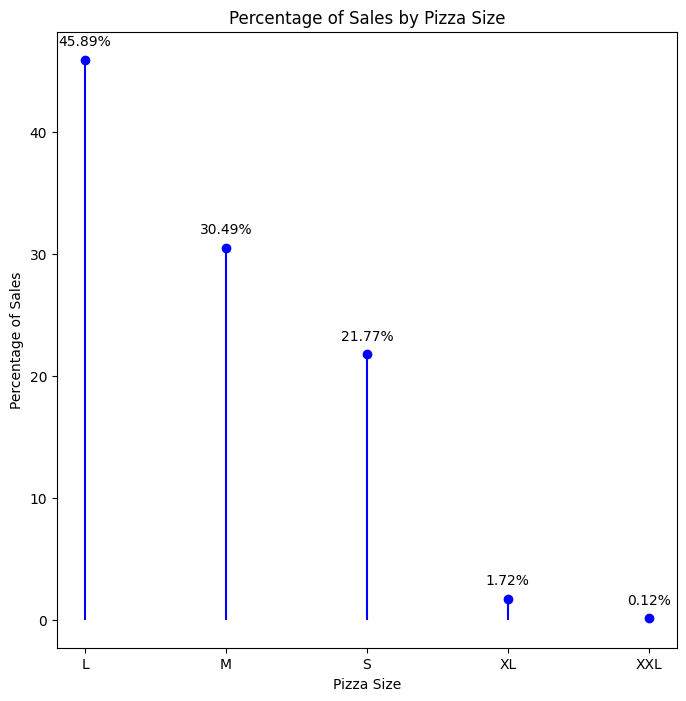

In [53]:
pizza_sizes =['L','M','S','XL','XXL']
size_percent_sale=[45.89,30.49,21.77,1.72,0.12]

plt.figure(figsize=(8,8))
plt.stem(pizza_sizes, size_percent_sale, linefmt='-b', markerfmt='ob', basefmt=' ')
for size, percent in zip(pizza_sizes, size_percent_sale):
    plt.annotate(f'{percent:.2f}%', (size, percent), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Pizza Size')
plt.ylabel('Percentage of Sales')
plt.title('Percentage of Sales by Pizza Size')
plt.show()

In [54]:
data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [72]:
top_5_pizzas_by_revenue_data = data.groupby('pizza_name')['total_price'].sum().nlargest(5)

print("top_5_pizzas_by_revenue:",top_5_pizzas_by_revenue_data)


top_5_pizzas_by_revenue: pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


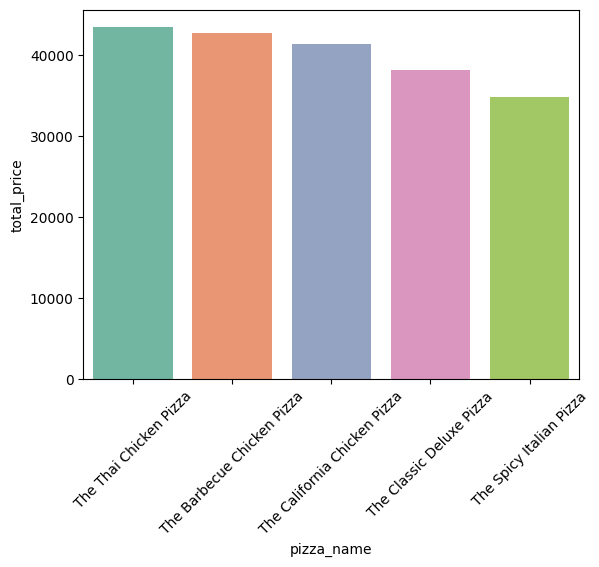

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt


top_5_pizzas_data = top_5_pizzas_by_revenue.reset_index()


sns.barplot(x='pizza_name', y='total_price', data=top_5_pizzas_data, hue='pizza_name', palette="Set2")
plt.xticks(rotation=45)  
plt.show()


In [79]:
data.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [97]:
Total_pizza_sold_data= data.groupby('pizza_name')['quantity'].sum().nlargest(5)

print("Total_pizza_sold:",Total_pizza_sold_data)




Total_pizza_sold: pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


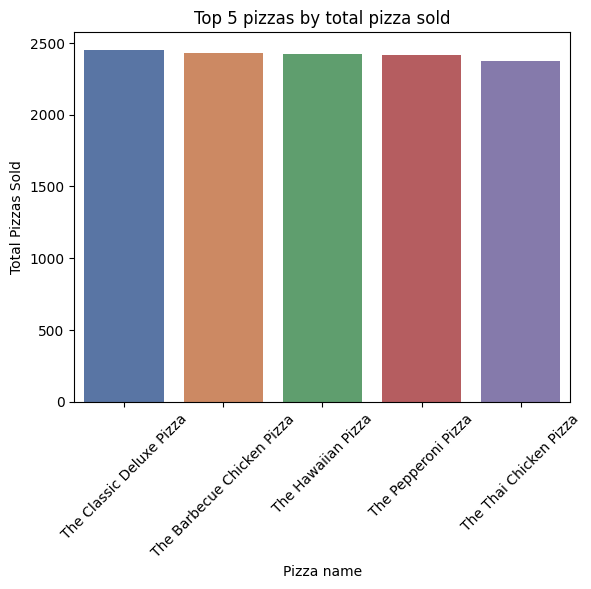

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

top_5_pizzas_data = Total_pizza_sold_data.reset_index()

sns.barplot(x='pizza_name', y='quantity', data=top_5_pizzas_data, hue='pizza_name', palette="deep")
plt.xticks(rotation=45)
plt.xlabel('Pizza name')
plt.ylabel('Total Pizzas Sold')
plt.title('Top 5 pizzas by total pizza sold')
plt.show()

In [101]:
#Bottom 5 pizza revenue

bottom5_Total_pizza_sold_data= data.groupby('pizza_name')['total_price'].sum().nsmallest(5)

print("Total_pizza_sold:",bottom5_Total_pizza_sold_data)

Total_pizza_sold: pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64


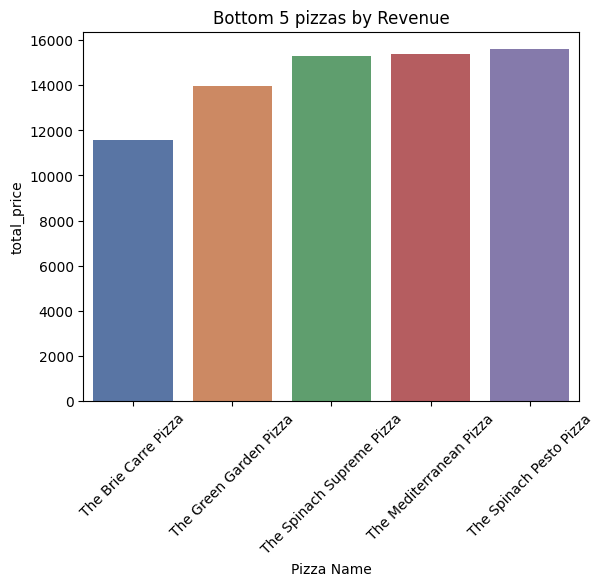

In [103]:
bottom_5_pizza_data =bottom5_Total_pizza_sold_data.reset_index()

sns.barplot(x='pizza_name',y='total_price',data=bottom_5_pizza_data,hue='pizza_name',palette="deep")
plt.xticks(rotation=45)
plt.xlabel('Pizza Name')
plt.ylabel('total_price')
plt.title('Bottom 5 pizzas by Revenue')
plt.show()


Bottom5_pizza_sold: pizza_name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


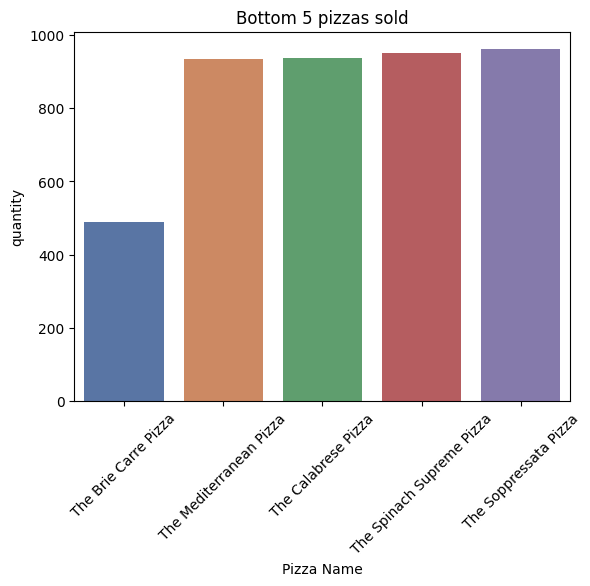

In [109]:
#Bottom 5 Pizzas by Total pizza sold

Bottom5_pizza_sold_data=data.groupby('pizza_name')['quantity'].sum().nsmallest(5)
print("Bottom5_pizza_sold:",Bottom5_pizza_sold_data)

bottom_5_pizza_sold=Bottom5_pizza_sold_data.reset_index()


sns.barplot(x='pizza_name',y='quantity',data=bottom_5_pizza_sold,hue='pizza_name',palette="deep")
plt.xticks(rotation=45)
plt.xlabel('Pizza Name')
plt.ylabel('quantity')
plt.title('Bottom 5 pizzas sold')
plt.show()


In [115]:
data['hour'] = data['order_time'].dt.hour

hourly_pizza_sold_by_category = data.groupby(['hour','pizza_category'])['quantity'].sum()

print(hourly_pizza_sold_by_category)



hour  pizza_category
9     Classic              2
      Supreme              1
      Veggie               1
10    Chicken              7
      Classic              6
      Supreme              3
      Veggie               2
11    Chicken            595
      Classic            860
      Supreme            676
      Veggie             597
12    Chicken           1488
      Classic           2039
      Supreme           1612
      Veggie            1637
13    Chicken           1432
      Classic           1931
      Supreme           1549
      Veggie            1501
14    Chicken            804
      Classic           1098
      Supreme            861
      Veggie             850
15    Chicken            715
      Classic            929
      Supreme            807
      Veggie             765
16    Chicken            938
      Classic           1292
      Supreme           1022
      Veggie             987
17    Chicken           1173
      Classic           1608
      Supreme         

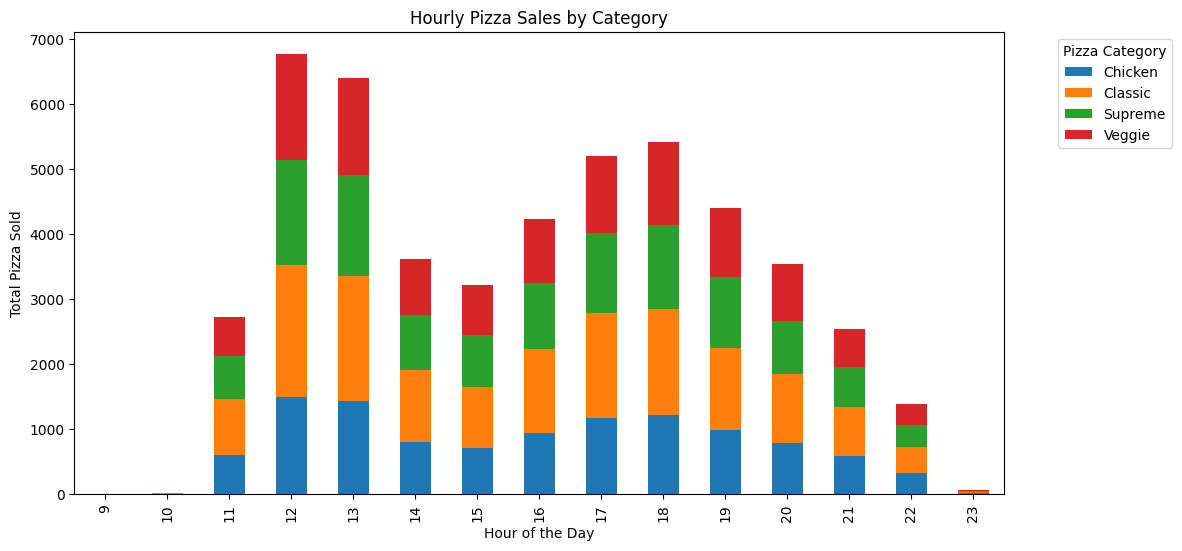

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

data['hour'] = data['order_time'].dt.hour

# Group the data by both 'hour' and 'pizza_category' and sum the 'quantity'
hourly_pizza_sold_by_category = data.groupby(['hour', 'pizza_category'])['quantity'].sum()

# Reshape the data to create a pivot table
hourly_pizza_sold_pivot = hourly_pizza_sold_by_category.unstack()

# Create a stacked bar chart
hourly_pizza_sold_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Total Pizza Sold')
plt.title('Hourly Pizza Sales by Category')
plt.legend(title='Pizza Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [117]:
data['hour'] = data['order_time'].dt.hour

hourly_pizza_sold_by_category = data.groupby('hour')['quantity'].sum()

print(hourly_pizza_sold_by_category)

hour
9        4
10      18
11    2728
12    6776
13    6413
14    3613
15    3216
16    4239
17    5211
18    5417
19    4406
20    3534
21    2545
22    1386
23      68
Name: quantity, dtype: int64
